# Proyecto - Análisis de Medallas Olímpicas

En este proyecto se realiza un análisis exploratorio sobre un conjunto de datos de medallas olímpicas utilizando Pandas

# Primero Cargamos los Datos

In [3]:
import pandas as pd
ruta = "C:/Users/jc629/OneDrive/CURSOS UDEMY/data analysis python/Pandas/medallas.csv"
data_frame = pd.read_csv(ruta)

In [5]:
data_frame

,Oro,Plata,Bronce,Total,Pais
0,NaN,1.0,2.0,3,Argentina
1,NaN,2.0,2.0,4,Armenia
2,17.0,7.0,22.0,46,Australia
3,1.0,1.0,5.0,7,Austria
4,NaN,3.0,4.0,7,Azerbaijan
...,...,...,...,...,...
88,NaN,1.0,NaN,1,Turkmenistan
89,2.0,1.0,1.0,4,Uganda
90,1.0,6.0,12.0,19,Ukraine
91,3.0,NaN,2.0,5,Uzbekistan


# Exploración inicial


In [8]:
data_frame.shape


(93, 5)

In [10]:
data_frame.head()

,Oro,Plata,Bronce,Total,Pais
0,NaN,1.0,2.0,3,Argentina
1,NaN,2.0,2.0,4,Armenia
2,17.0,7.0,22.0,46,Australia
3,1.0,1.0,5.0,7,Austria
4,NaN,3.0,4.0,7,Azerbaijan


In [12]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Oro     65 non-null     float64
 1   Plata   69 non-null     float64
 2   Bronce  76 non-null     float64
 3   Total   93 non-null     int64  
 4   Pais    93 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ KB


In [14]:
data_frame.describe()

,Oro,Plata,Bronce,Total
count,65.000000,69.000000,76.000000,93.000000
mean,4.400000,4.768116,4.934211,10.548387
std,7.633806,7.276362,6.261705,18.897617
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000
50%,2.000000,2.000000,2.000000,4.000000
75%,3.000000,5.000000,5.250000,8.000000
max,39.000000,41.000000,33.000000,113.000000


In [16]:
data_frame.isnull().sum()

Oro       28
Plata     24
Bronce    17
Total      0
Pais       0
dtype: int64

# Realizamos la limpieza de Datos

In [19]:
#Primero reemplazamos valores no válidos
df = data_frame.fillna(0)
df

,Oro,Plata,Bronce,Total,Pais
0,0.0,1.0,2.0,3,Argentina
1,0.0,2.0,2.0,4,Armenia
2,17.0,7.0,22.0,46,Australia
3,1.0,1.0,5.0,7,Austria
4,0.0,3.0,4.0,7,Azerbaijan
...,...,...,...,...,...
88,0.0,1.0,0.0,1,Turkmenistan
89,2.0,1.0,1.0,4,Uganda
90,1.0,6.0,12.0,19,Ukraine
91,3.0,0.0,2.0,5,Uzbekistan


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Oro     93 non-null     float64
 1   Plata   93 non-null     float64
 2   Bronce  93 non-null     float64
 3   Total   93 non-null     int64  
 4   Pais    93 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ KB


# Corregimos el tipo de datos

In [24]:
df['Oro'] = df['Oro'].astype(int)
df['Plata'] = df['Plata'].astype(int)
df['Bronce'] = df['Bronce'].astype(int)
df

,Oro,Plata,Bronce,Total,Pais
0,0,1,2,3,Argentina
1,0,2,2,4,Armenia
2,17,7,22,46,Australia
3,1,1,5,7,Austria
4,0,3,4,7,Azerbaijan
...,...,...,...,...,...
88,0,1,0,1,Turkmenistan
89,2,1,1,4,Uganda
90,1,6,12,19,Ukraine
91,3,0,2,5,Uzbekistan


# Análisis de medallas de oro por país


In [27]:
top_3_oro = df.sort_values('Oro', ascending = False).head(3)
top_3_oro

,Oro,Plata,Bronce,Total,Pais
25,39,41,33,113,Estados Unidos de America
72,38,32,18,88,Republica Popular de China
46,27,14,17,58,Japon


In [29]:
#Análisis de medallas totales por País
filtro = df['Total'] > 10
mas_de_10 = df[filtro]
mas_de_10.sort_values('Total', ascending = False)

,Oro,Plata,Bronce,Total,Pais
25,39,41,33,113,Estados Unidos de America
72,38,32,18,88,Republica Popular de China
73,2,28,23,71,ROC
34,22,21,22,65,Gran Bretana
46,27,14,17,58,Japon
2,17,7,22,46,Australia
32,1,11,16,37,Germany
60,1,12,14,36,Netherlands
30,1,12,11,33,France
14,7,6,11,24,Canada


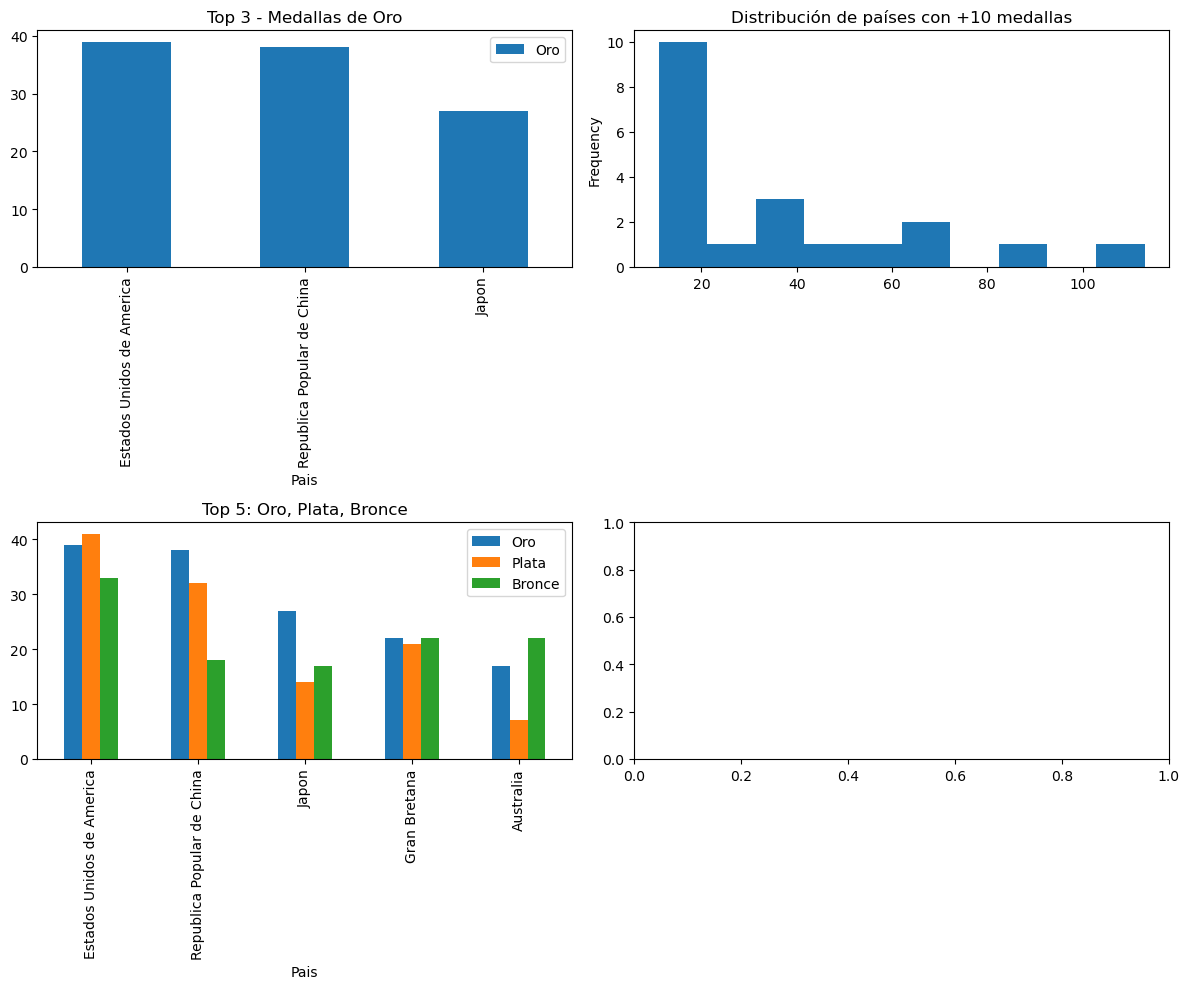

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

def cargar_datos(ruta: str) -> pd.DataFrame:
    """Carga y limpia los datos de medallas."""
    df = pd.read_csv(ruta)
    df = df.fillna(0)
    df[['Oro', 'Plata', 'Bronce']] = df[['Oro', 'Plata', 'Bronce']].astype(int)
    return df

def analizar_medallas(df: pd.DataFrame) -> dict:
    """Realiza análisis clave y genera métricas."""
    resultados = {
        'top_3_oro': df.nlargest(3, 'Oro'),
        'paises_mas_10_medallas': df[df['Total'] > 10].sort_values('Total', ascending=False),
        'medallas_totales_global': df['Total'].sum(),
        'top_5_combinado': df.nlargest(5, 'Total')
    }
    return resultados

def visualizar_datos(df: pd.DataFrame):
    """Crea gráficos para mostrar hallazgos."""
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    # Top 3 medallas de oro
    df.nlargest(3, 'Oro').plot.bar(x='Pais', y='Oro', ax=ax[0,0], title='Top 3 - Medallas de Oro')
    
    # Distribución de medallas totales
    df[df['Total'] > 10]['Total'].plot.hist(ax=ax[0,1], title='Distribución de países con +10 medallas')
    
    # Comparación oro-plata-bronce (top 5)
    df.set_index('Pais')[['Oro', 'Plata', 'Bronce']].nlargest(5, 'Oro').plot.bar(ax=ax[1,0], title='Top 5: Oro, Plata, Bronce')
    
    plt.tight_layout()
    plt.savefig('analisis_medallas.png', dpi=120)
    plt.show()

if __name__ == "__main__":
    # Cargar datos
    df = cargar_datos('C:/Users/jc629/OneDrive/CURSOS UDEMY/data analysis python/Pandas/medallas.csv')  # Archivo en misma carpeta
    
    # Análisis
    resultados = analizar_medallas(df)
    
    # Exportar resultados clave
    resultados['paises_mas_10_medallas'].to_csv('top_paises_medallas.csv', index=False)
    
    # Visualización
    visualizar_datos(df)

MATRIZ DE CORRELACIÓN:
             Oro     Plata    Bronce     Total
Oro     1.000000  0.809383  0.747011  0.852121
Plata   0.809383  1.000000  0.873760  0.958887
Bronce  0.747011  0.873760  1.000000  0.937194
Total   0.852121  0.958887  0.937194  1.000000


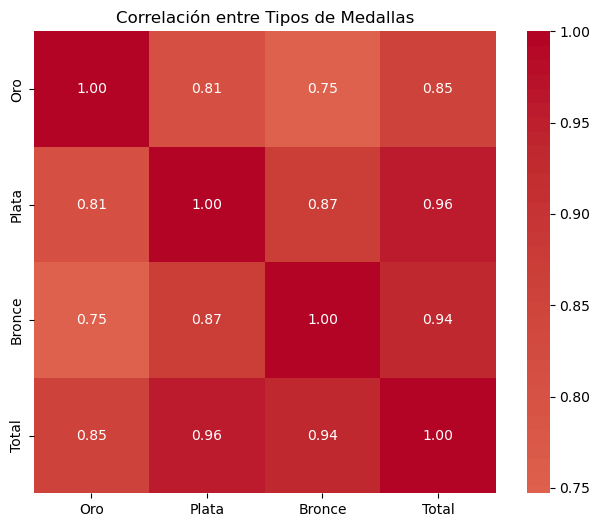

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos (usando tu código base)
df = pd.read_csv('C:/Users/jc629/OneDrive/CURSOS UDEMY/data analysis python/Pandas/medallas.csv')
df = df.fillna(0)
df[['Oro', 'Plata', 'Bronce']] = df[['Oro', 'Plata', 'Bronce']].astype(int)

# ANÁLISIS DE CORRELACIÓN
correlaciones = df[['Oro', 'Plata', 'Bronce', 'Total']].corr()

print("MATRIZ DE CORRELACIÓN:")
print(correlaciones)

# Visualización con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt=".2f")
plt.title('Correlación entre Tipos de Medallas')
plt.show()

KeyError: 'Total'

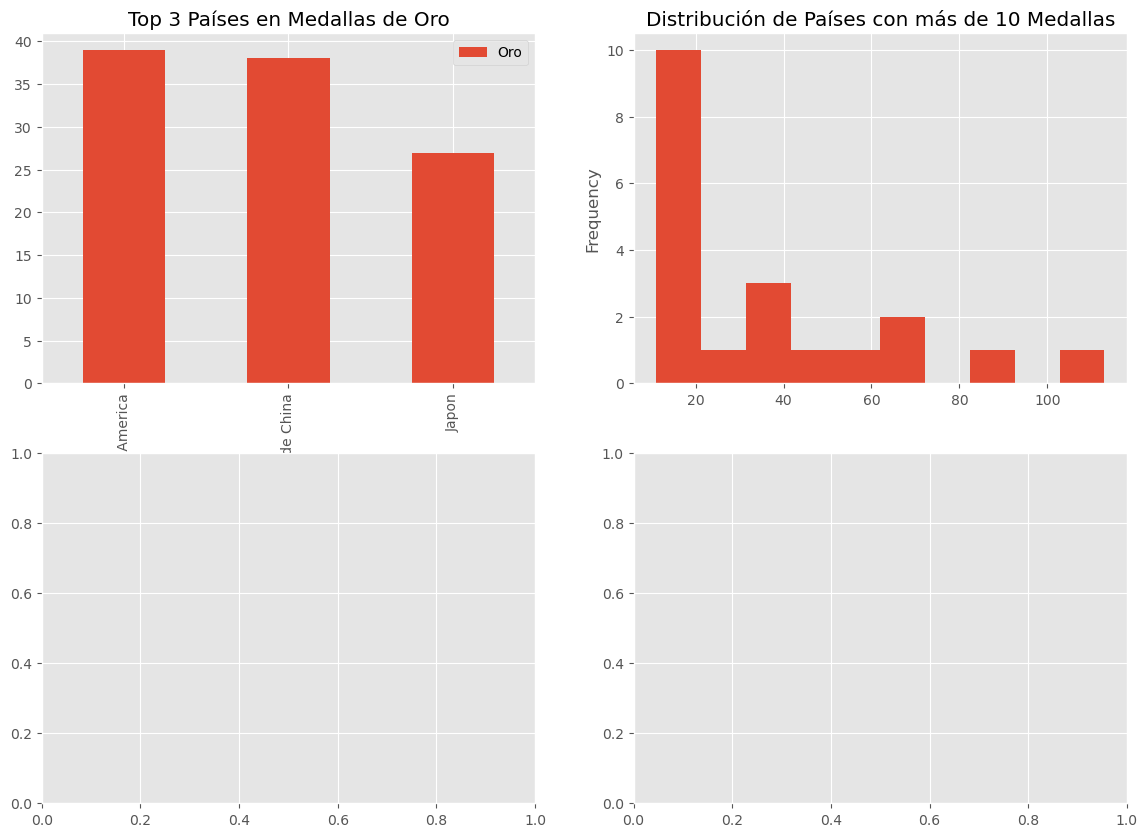

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# ============================================================
# 1. CARGA Y LIMPIEZA DE DATOS
# ============================================================

def cargar_datos(ruta: str) -> pd.DataFrame:
    """
    Carga el archivo CSV, valida columnas y limpia los datos.
    """
    columnas_requeridas = {'Pais', 'Oro', 'Plata', 'Bronce', 'Total'}

    try:
        df = pd.read_csv(ruta)
    except Exception as e:
        raise FileNotFoundError(f"No se pudo cargar el archivo: {e}")

    if not columnas_requeridas.issubset(df.columns):
        faltantes = columnas_requeridas - set(df.columns)
        raise ValueError(f"Faltan columnas necesarias: {faltantes}")

    # Rellenar valores vacíos en columnas numéricas
    df[['Oro', 'Plata', 'Bronce', 'Total']] = df[['Oro', 'Plata', 'Bronce', 'Total']].fillna(0).astype(int)

    return df


# ============================================================
# 2. ANÁLISIS DESCRIPTIVO
# ============================================================

def analisis_medallas(df: pd.DataFrame) -> dict:
    """
    Calcula métricas clave del dataset.
    """
    df['proporcion_oro'] = df['Oro'] / df['Total'].replace(0, 1)
    df['score'] = df['Oro']*3 + df['Plata']*2 + df['Bronce']*1  # Ranking olímpico estandarizado

    resultados = {
        'pais_dominante': df.loc[df['Total'].idxmax()],
        'top_3_oros': df.nlargest(3, 'Oro'),
        'top_5_totales': df.nlargest(5, 'Total'),
        'top_5_score': df.nlargest(5, 'score'),
        'mayor_proporcion_oro': df.nlargest(5, 'proporcion_oro'),
        'paises_mas_10_medallas': df[df['Total'] > 10].sort_values('Total', ascending=False),
        'medallas_totales_global': df['Total'].sum()
    }

    return resultados


# ============================================================
# 3. VISUALIZACIONES
# ============================================================

def visualizar_datos(df: pd.DataFrame):
    """
    Crea gráficos profesionales del análisis de medallas.
    """
    plt.style.use("ggplot")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Top 3 medallas de oro
    df.nlargest(3, 'Oro').plot.bar(
        x='Pais', y='Oro', ax=axes[0, 0], title='Top 3 Países en Medallas de Oro'
    )

    # Distribución de medallas totales
    df[df['Total'] > 10]['Total'].plot.hist(
        ax=axes[0, 1], bins=10, title='Distribución de Países con más de 10 Medallas'
    )

    # Top 5 comparación Oro / Plata / Bronce
    df.set_index('Pais')[['Oro', 'Plata', 'Bronce']]\
        .nlargest(5, 'Total')\
        .plot.bar(ax=axes[1, 0], title='Top 5 Países por Medallas Totales')

    # Proporción de oro
    df.sort_values('proporcion_oro', ascending=False).head(5).plot.bar(
        x='Pais', y='proporcion_oro', ax=axes[1, 1], title='Top 5: Proporción de Oro'
    )

    plt.tight_layout()
    plt.savefig('visualizaciones_medallas.png', dpi=120)
    plt.show()


# ============================================================
# 4. NORMALIZACIÓN PARA FUTURO ML
# ============================================================

def normalizar(df: pd.DataFrame) -> pd.DataFrame:
    """
    Normaliza las columnas numéricas para futuros modelos ML.
    """
    cols = ['Oro', 'Plata', 'Bronce', 'Total', 'score']
    scaler = StandardScaler()

    df_norm = df.copy()
    df_norm[cols] = scaler.fit_transform(df[cols])

    return df_norm


# ============================================================
# 5. MAIN
# ============================================================

if __name__ == "__main__":
    ruta = "C:/Users/jc629/OneDrive/CURSOS UDEMY/data analysis python/Pandas/medallas.csv"
    
    # 1. Cargar datos
    df = cargar_datos(ruta)

    # 2. Análisis
    resultados = analisis_medallas(df)

    # 3. Visualización
    visualizar_datos(df)

    # 4. Exportar resultados
    resultados['paises_mas_10_medallas'].to_csv('top_paises_medallas.csv', index=False)

    # 5. Dataset normalizado (para ML)
    df_norm = normalizar(df)
    df_norm.to_csv('medallas_normalizado.csv', index=False)

    print("Análisis completado y archivos exportados.")
